In [114]:
import pandas as pd 
import numpy as np
import statsmodels.api as statsm
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
WHO = pd.read_csv("WHO_Obesity_Celaned.csv")
WHO

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


In [116]:
WHO_MX = WHO[WHO_Obesity_Cleaned["Country"]=="Mexico"]
WHO_MX

,Unnamed: 0,Country,Year,Obesity (%),Sex
13860,13860,Mexico,1975,9.5 [6.2-13.5],Both sexes
13861,13861,Mexico,1975,5.7 [2.8-10.0],Male
13862,13862,Mexico,1975,13.0 [7.5-19.5],Female
13863,13863,Mexico,1976,9.9 [6.6-13.8],Both sexes
13864,13864,Mexico,1976,6.0 [3.1-10.3],Male
...,...,...,...,...,...
13981,13981,Mexico,2015,23.8 [18.8-28.8],Male
13982,13982,Mexico,2015,32.3 [27.1-37.7],Female
13983,13983,Mexico,2016,28.9 [25.2-32.8],Both sexes
13984,13984,Mexico,2016,24.3 [19.0-29.7],Male


In [117]:
WHO_MX_F = WHO_MX[WHO_MX["Sex"]=="Female"]
WHO_MX_M = WHO_MX[WHO_MX["Sex"]=="Male"]
WHO_MX_B = WHO_MX[WHO_MX["Sex"]=="Both sexes"]

<ipython-input-123-2dcbe9bce5bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHO_MX_F["New Obesity"] = val_f[0]
<ipython-input-123-2dcbe9bce5bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHO_MX_F["New Obesity"] = pd.to_numeric(WHO_MX_F["New Obesity"])
<ipython-input-123-2dcbe9bce5bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

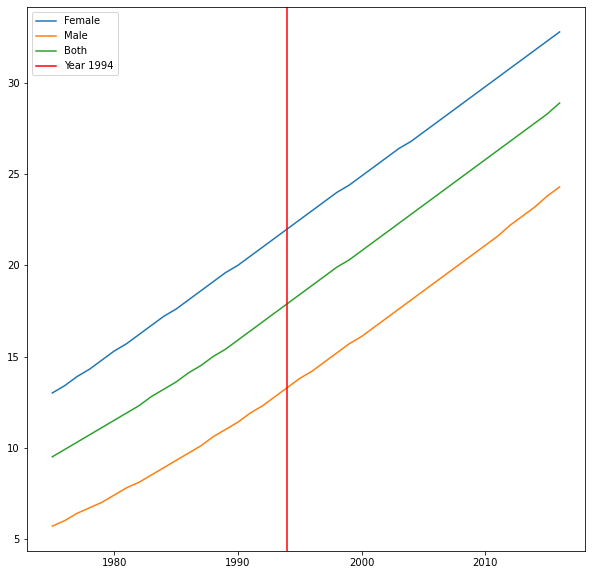

In [123]:
val_f = WHO_MX_F["Obesity (%)"].str.split(" ", n = 1, expand = True)
WHO_MX_F["New Obesity"] = val_f[0]
WHO_MX_F["New Obesity"] = pd.to_numeric(WHO_MX_F["New Obesity"])

val_m = WHO_MX_M["Obesity (%)"].str.split(" ", n = 1, expand = True)
WHO_MX_M["New Obesity"] = val_m[0]
WHO_MX_M["New Obesity"] = pd.to_numeric(WHO_MX_M["New Obesity"])

val_b = WHO_MX_B["Obesity (%)"].str.split(" ", n = 1, expand = True)
WHO_MX_B["New Obesity"] = val_b[0]
WHO_MX_B["New Obesity"] = pd.to_numeric(WHO_MX_B["New Obesity"])

plt.figure(figsize = [10,10])
plt.plot(WHO_MX_F["Year"], WHO_MX_F["New Obesity"], label = "Female") # Female
plt.plot(WHO_MX_M["Year"], WHO_MX_M["New Obesity"], label = "Male")# Male
plt.plot(WHO_MX_B["Year"], WHO_MX_B["New Obesity"], label = "Both")# Both
plt.axvline(x=1994, color = 'r', label = 'Year 1994')# Year 1994
plt.legend()

$$---------------------------------------------------------------------------------------$$
$$---------------------------------------------------------------------------------------$$
$$---------------------------------------------------------------------------------------$$

In [15]:
# Daily Caloric Supply
DCS = pd.read_csv("daily-per-capita-caloric-supply.csv")
DCS

,Entity,Code,Year,Daily caloric supply (FAO (2017) & Various historical sources)
0,Afghanistan,AFG,1961,2999.0
1,Afghanistan,AFG,1962,2917.0
2,Afghanistan,AFG,1963,2698.0
3,Afghanistan,AFG,1964,2953.0
4,Afghanistan,AFG,1965,2956.0
...,...,...,...,...
9546,Zimbabwe,ZWE,2009,2147.0
9547,Zimbabwe,ZWE,2010,2168.0
9548,Zimbabwe,ZWE,2011,2200.0
9549,Zimbabwe,ZWE,2012,2197.0


In [185]:
# Cleaning the data to display Entity=Mexico only.
DCS_MX = (DCS[DCS["Entity"]=="Mexico"])
DCS_MX.columns = ['Country','Code','Year',"Daily Caloric Supply"]
DCS_MX = DCS_MX.iloc[4:]
print(DCS_MX.head())

     Country Code  Year  Daily Caloric Supply
5527  Mexico  MEX  1961                2300.0
5528  Mexico  MEX  1962                2286.0
5529  Mexico  MEX  1963                2300.0
5530  Mexico  MEX  1964                2353.0
5531  Mexico  MEX  1965                2369.0


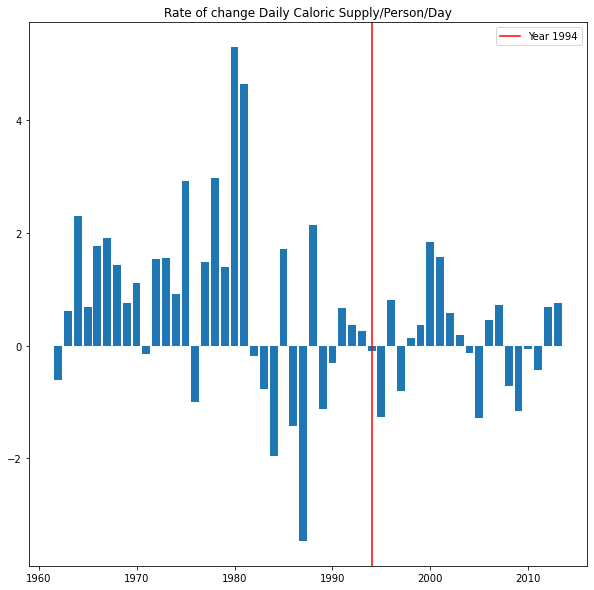

In [139]:
plt.figure(figsize = [10,10])
plt.subplot(2,2,1)
plt.axvline(x=1994, color = 'r', label = 'Year 1994')
plt.plot(DCS_MX["Year"], DCS_MX["Daily Caloric Supply"])
plt.title('Daily Caloric Supply/Person/Day')
plt.legend()

plt.subplot(2,2,2)
ax = plt.subplot()
plt.axvline(x=1994, color = 'r', label = 'Year 1994')
ax.bar(DCS_MX["Year"], DCS_MX["Daily Caloric Supply"].pct_change()*100)
plt.title('Rate of change Daily Caloric Supply/Person/Day')
plt.legend()


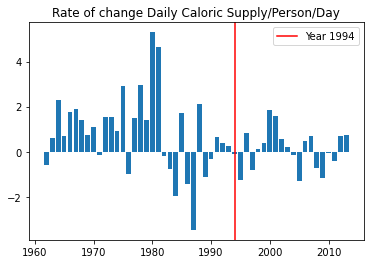

In [137]:
ax = plt.subplot()
plt.axvline(x=1994, color = 'r', label = 'Year 1994')
ax.bar(DCS_MX["Year"], DCS_MX["Daily Caloric Supply"].pct_change()*100)
plt.title('Rate of change Daily Caloric Supply/Person/Day')
plt.legend()

$$---------------------------------------------------------------------------------------$$
$$---------------------------------------------------------------------------------------$$
$$---------------------------------------------------------------------------------------$$

In [89]:
# Share of Adults Defined as Obese(Obese Adults [OA] )
OA = pd.read_csv("share-of-adults-defined-as-obese.csv")
OA

,Entity,Code,Year,Prevalence of obesity (both sexes) - WHO (2019)
0,Afghanistan,AFG,1975,0.5
1,Afghanistan,AFG,1976,0.5
2,Afghanistan,AFG,1977,0.6
3,Afghanistan,AFG,1978,0.6
4,Afghanistan,AFG,1979,0.6
...,...,...,...,...
8311,Zimbabwe,ZWE,2012,14.3
8312,Zimbabwe,ZWE,2013,14.6
8313,Zimbabwe,ZWE,2014,14.9
8314,Zimbabwe,ZWE,2015,15.2


In [186]:
# Cleaning the set to display Mexico's data only.
OA_MX = (OA[OA["Entity"]=="Mexico"])
OA_MX.columns = ['Country','Code','Year','Prevalence of obesity']
print(OA_MX.head())

     Country Code  Year  Prevalence of obesity
4788  Mexico  MEX  1975                    9.5
4789  Mexico  MEX  1976                    9.9
4790  Mexico  MEX  1977                   10.3
4791  Mexico  MEX  1978                   10.7
4792  Mexico  MEX  1979                   11.1


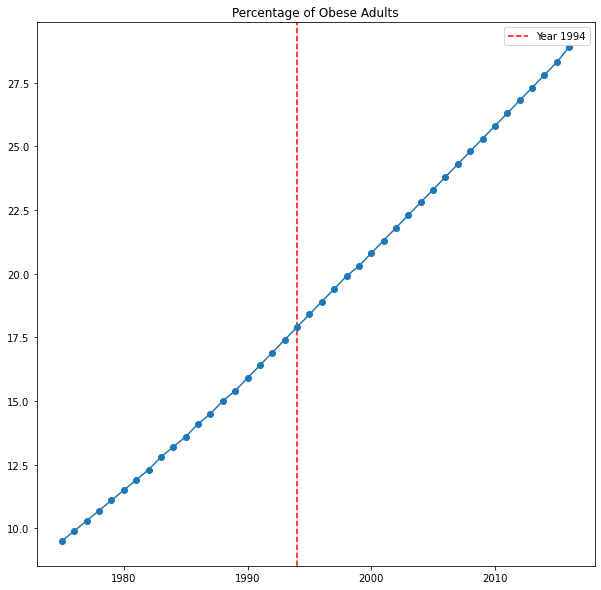

In [128]:
plt.figure(figsize = [10,10])
plt.axvline(x=1994, color = 'r', label = 'Year 1994', linestyle='--')
plt.plot(OA_MX["Year"], OA_MX["Prevalence of obesity"], marker = 'o')
plt.title('Percentage of Obese Adults')
plt.legend()

$$---------------------------------------------------------------------------------------$$
$$---------------------------------------------------------------------------------------$$
$$---------------------------------------------------------------------------------------$$

In [176]:
# Importing data
WHO_BMI = pd.read_csv("WHO_BMI.csv")
print(WHO_BMI.head())

  IndicatorCode                                          Indicator ValueType  \
0   NCD_BMI_30C  Prevalence of obesity among adults, BMI &Great...   numeric   
1   NCD_BMI_30C  Prevalence of obesity among adults, BMI &Great...   numeric   
2   NCD_BMI_30C  Prevalence of obesity among adults, BMI &Great...   numeric   
3   NCD_BMI_30C  Prevalence of obesity among adults, BMI &Great...   numeric   
4   NCD_BMI_30C  Prevalence of obesity among adults, BMI &Great...   numeric   

  ParentLocationCode   ParentLocation Location type SpatialDimValueCode  \
0                AFR           Africa       Country                 UGA   
1                AFR           Africa       Country                 ETH   
2                AFR           Africa       Country                 RWA   
3                WPR  Western Pacific       Country                 VNM   
4                AFR           Africa       Country                 BDI   

   Location Period type  Period  ...  FactValueUoM FactValueNumericL

In [177]:
# Cleaning the set to display Mexico's data only.
WHO_BMI_MX = (WHO_BMI[WHO_BMI["SpatialDimValueCode"]=="MEX"])

# Eliminating unnecessary data
WHO_BMI_MX = WHO_BMI_MX.drop(columns=['Period type','IndicatorCode','Indicator','ValueType','ParentLocationCode','ParentLocation','Location type'])
WHO_BMI_MX = WHO_BMI_MX.drop(columns=['IsLatestYear','Dim1 type','Dim1ValueCode','Dim2ValueCode','Dim2 type','Dim2','Dim3 type','Dim3','Dim3ValueCode'])
WHO_BMI_MX = WHO_BMI_MX.drop(columns=['DataSourceDimValueCode','DataSource','FactValueNumericPrefix','FactValueNumeric','FactValueUoM','FactValueNumericLowPrefix'])
WHO_BMI_MX = WHO_BMI_MX.drop(columns=['FactValueNumericLow','FactValueNumericHighPrefix','FactValueNumericHigh','FactValueTranslationID','FactComments','Language','DateModified'])

# Renaming columns for easier comprehension
WHO_BMI_MX.columns = ['Country Code','Country','Year','Sex','BMI']
WHO_BMI_MX

,Country Code,Country,Year,Sex,BMI
217,MEX,Mexico,2016,Male,23.7 [18.5 – 29.1]
328,MEX,Mexico,2016,Both sexes,28.4 [24.7 – 32.3]
400,MEX,Mexico,2016,Female,32.6 [27.2 – 38.3]
798,MEX,Mexico,2015,Male,23.1 [18.3 – 28.2]
909,MEX,Mexico,2015,Both sexes,27.8 [24.4 – 31.5]
...,...,...,...,...,...
23825,MEX,Mexico,1976,Male,5.3 [2.7 – 9.1]
23945,MEX,Mexico,1976,Both sexes,8.6 [5.7 – 12.1]
24217,MEX,Mexico,1975,Female,11.4 [6.5 – 17.4]
24405,MEX,Mexico,1975,Male,5.1 [2.5 – 8.9]


In [179]:
# Dividing sexes
WHO_BMI_F = WHO_BMI_MX[WHO_BMI_MX["Sex"]=="Female"]
WHO_BMI_M = WHO_BMI_MX[WHO_BMI_MX["Sex"]=="Male"]
WHO_BMI_B = WHO_BMI_MX[WHO_BMI_MX["Sex"]=="Both sexes"]

<ipython-input-184-42f46ecc1713>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHO_BMI_F["New BMI"] = val_bmi_f[0]
<ipython-input-184-42f46ecc1713>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHO_BMI_F["New BMI"] = pd.to_numeric(WHO_BMI_F["New BMI"])
<ipython-input-184-42f46ecc1713>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

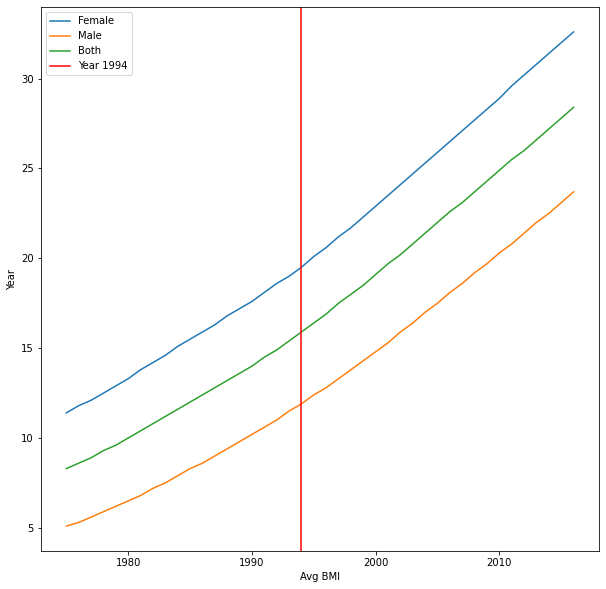

In [184]:
# Plotting Data
val_bmi_f = WHO_BMI_F["BMI"].str.split(" ", n = 1, expand = True)
WHO_BMI_F["New BMI"] = val_bmi_f[0]
WHO_BMI_F["New BMI"] = pd.to_numeric(WHO_BMI_F["New BMI"])

val_bmi_m = WHO_BMI_M["BMI"].str.split(" ", n = 1, expand = True)
WHO_BMI_M["New BMI"] = val_bmi_m[0]
WHO_BMI_M["New BMI"] = pd.to_numeric(WHO_BMI_M["New BMI"])

val_bmi_b = WHO_BMI_B["BMI"].str.split(" ", n = 1, expand = True)
WHO_BMI_B["New BMI"] = val_bmi_b[0]
WHO_BMI_B["New BMI"] = pd.to_numeric(WHO_BMI_B["New BMI"])

plt.figure(figsize = [10,10])
plt.plot(WHO_BMI_F["Year"], WHO_BMI_F["New BMI"], label = "Female") # Female
plt.plot(WHO_BMI_M["Year"], WHO_BMI_M["New BMI"], label = "Male")# Male
plt.plot(WHO_BMI_B["Year"], WHO_BMI_B["New BMI"], label = "Both")# Both
plt.axvline(x=1994, color = 'r', label = 'Year 1994')# Year 1994

plt.xlabel('Avg BMI')
plt.ylabel('Year')
plt.legend()